## CNN 필터 시각화
#### CNN 모델은 과연 무엇을 학습하고 있을까?
#### MNIST 데이터셋 훈련

In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print('\n')
print("Initial shape or dimensions of x_train:", str(x_train.shape))
print("Number of samples in our training data:", str(len(x_train)))
print("Number of labels in our training data:", str(len(y_train)))
print("Number of samples in our test data:", str(len(x_test)))
print("Number of labels in our test data:", str(len(y_test)))

print('\n')
print('Dimensions of x_train: ' + str(x_train[0].shape))
print('Labels in y_train: ' + str(y_train.shape))
print('Dimensions of x_test: ' + str(x_test[0].shape))
print('Labels in y_test: ' + str(y_test.shape))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7063290456899961450
xla_global_id: -1
]


Initial shape or dimensions of x_train: (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train: (28, 28)
Labels in y_train: (60000,)
Dimensions of x_test: (28, 28)
Labels in y_test: (10000,)


In [2]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('Number of Classes: ' + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Number of Classes: 10


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

print(model.summary())

C:\Users\its\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

None


In [4]:
batch_size = 128
epochs = 10

'''
Store our results here so we can plot later
In our fit function we specify our datasets(x_train & y_train),
the batch size(typically 16 to 128 depending on your RAM), the number of
epochs(usually 10 to 100) and our validation datasets(x_test & y_test)
verbose = 1, sets our training to output performance metrics every epoch
'''
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# We obtain our accuracy score using the evaluate function
# Score holds two values, out Test loss and Accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.2455 - loss: 2.2551 - val_accuracy: 0.6605 - val_loss: 2.0072
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.7016 - loss: 1.7884 - val_accuracy: 0.8201 - val_loss: 0.8762
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.8262 - loss: 0.7498 - val_accuracy: 0.8789 - val_loss: 0.4738
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 65ms/step - accuracy: 0.8725 - loss: 0.4688 - val_accuracy: 0.8933 - val_loss: 0.3787
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.8874 - loss: 0.3930 - val_accuracy: 0.9055 - val_loss: 0.3363
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.8990 - loss: 0.3499 - val_accuracy: 0.9117 - val_loss: 0.3098
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9060 - loss: 0.3234 - val_accuracy: 0.9166 - val_loss: 0.2911
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9096 - loss: 0.3066 - 

In [5]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'conv2d': <Conv2D name=conv2d, built=True>,
 'conv2d_1': <Conv2D name=conv2d_1, built=True>,
 'max_pooling2d': <MaxPooling2D name=max_pooling2d, built=True>,
 'flatten': <Flatten name=flatten, built=True>,
 'dense': <Dense name=dense, built=True>,
 'dense_1': <Dense name=dense_1, built=True>}

#### Convolution 필터 Shape 가져오기

In [6]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 64)


In [7]:
# 가중치 확인하기

filters, biases = model.layers[0].get_weights()
print(filters.shape)
filters

(3, 3, 1, 32)


array([[[[-2.38358658e-02,  4.62174043e-03,  6.88223839e-02,
           9.36029255e-02, -1.17450014e-01,  1.95317402e-01,
           1.52989253e-01,  1.06413879e-01, -3.47482099e-04,
           1.11174181e-01, -1.31573573e-01,  1.15917243e-01,
          -2.67252643e-02, -5.55414371e-02,  2.12858796e-01,
          -5.12080230e-02, -6.53569773e-02, -2.58704517e-02,
           1.40844852e-01,  1.64078206e-01,  1.01091668e-04,
          -8.64598528e-02,  7.79942609e-03,  3.70649248e-02,
          -3.17216441e-02, -5.30381836e-02,  2.25934247e-03,
           1.38639286e-01,  8.03553462e-02,  1.18933327e-01,
           1.47866130e-01,  7.33536035e-02]],

        [[-3.47670130e-02,  1.19957134e-01,  5.30330986e-02,
           4.99960929e-02,  4.08168323e-03, -6.85821939e-03,
          -7.95166120e-02,  1.90155223e-01, -1.17889680e-02,
           1.17877476e-01, -6.35765493e-02,  2.07990874e-02,
          -1.50364162e-02, -2.30192803e-02,  2.43538767e-01,
           3.81012335e-02,  6.92631975

In [8]:
print(biases.shape)
biases

(32,)


array([-5.5365334e-03,  8.7184869e-03, -1.4409669e-02,  4.4347547e-04,
       -8.3232326e-06,  3.9909821e-05,  9.1930283e-03,  2.9527657e-03,
        2.3240494e-03,  2.0118956e-02,  2.2919666e-02,  2.4348740e-02,
       -1.3790079e-03,  4.8789950e-03,  1.3324360e-02,  2.0957254e-05,
        1.2946315e-02,  4.3476408e-05,  1.2304500e-04,  2.0933112e-03,
       -4.9556687e-04,  1.9665402e-03,  1.9269388e-02, -1.1877913e-05,
        7.6975762e-03,  1.8888967e-02,  9.5392233e-03,  1.4109630e-02,
        2.2198872e-03, -7.2760605e-03,  7.4619352e-06,  2.2319287e-02],
      dtype=float32)

In [9]:
# 0~1 사이값으로 normalize. 시각화를 위해!
f_min, f_max = filters.min(), filters.max()

filters = (filters-f_min) / (f_max-f_min)
print(f'After Normalization, Min = {filters.min()} and Max = {filters.max()}')

After Normalization, Min = 0.0 and Max = 1.0


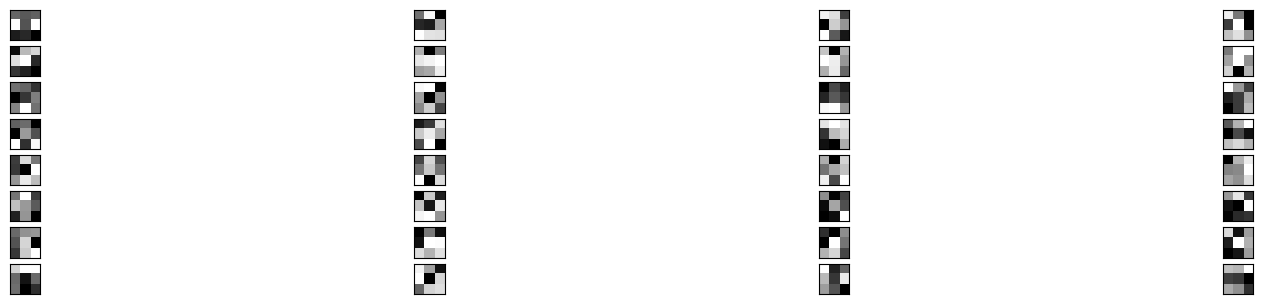

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# plot first few filters and set plot size
n_filters, ix = 32, 1
plt.figure(figsize=(20,15))

for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # print(f.shape)

    # Arrange in subplot of 4 x 8
    ax = plt.subplot(n_filters, 4, ix)
    ax.set_xticks([])
    ax.set_yticks([])

    # plot filter channel in grayscale
    plt.imshow(np.squeeze(f, axis=2), cmap='gray')
    ix += 1

# show the figure
plt.show()

#### Filter Activation

In [11]:
from tensorflow.keras.models import Model

layer_outputs = [layer.output for layer in model.layers[:2]]

# 입력을 주면 상응하는 출력을 돌려주는 모델 설정
activation_model = Model(inputs=model.input, outputs=layer_outputs)

ValueError: The layer sequential has never been called and thus has no defined input.